# **Stellar Classification**

### Phân loại các loại sao và hành tinh

*Description: These project helps identifying and classifying the object to know whether they are stars, galaxies or quasars based on 18 features columns.*

*Language used: English*

*Author: Hoang Anh Tuan*

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

## **Data Import and Initial View**

In [62]:
# Importing Data
link = 'https://drive.google.com/file/d/1BvsAfbuFhGDfJLZ_0r2hJDpKs9Emica1/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
ste_df = pd.read_csv(path)

In [63]:
# First look
ste_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cap_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237660e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,70177,2,79,6.543780e+18,GALAXY,0.634794,5812,56354,171
1,1.237660e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,70177,5,119,1.176010e+19,GALAXY,0.779136,10445,58158,427
2,1.237660e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,70177,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237660e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,70177,3,214,1.030110e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,70177,3,137,6.891860e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237680e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,70177,2,581,1.060000e+19,GALAXY,0.000000,9374,57749,438
99996,1.237680e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,70177,1,289,8.586350e+18,GALAXY,0.404895,7626,56934,866
99997,1.237670e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,70177,4,308,3.112010e+18,GALAXY,0.143366,2764,54535,74
99998,1.237660e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,70177,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


**This dataset contains exactly 100,000 records and ~18 features columns. Knowing the target columns is "class"**

In [64]:
# Show info
ste_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            99984 non-null   float64
 4   g            99958 non-null   float64
 5   r            99956 non-null   float64
 6   i            99962 non-null   float64
 7   z            99980 non-null   float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cap_ID       100000 non-null  int64  
 11  cam_col      100000 non-null  int64  
 12  field_ID     100000 non-null  int64  
 13  spec_obj_ID  100000 non-null  float64
 14  class        99889 non-null   object 
 15  redshift     100000 non-null  float64
 16  plate        100000 non-null  int64  
 17  MJD          100000 non-null  int64  
 18  fiber_ID     100000 non-n

In [65]:
# Show description
ste_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cap_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,99984.000000,99958.000000,99956.000000,99962.000000,99980.000000,100000.000000,100000.0,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237688e+18,177.629117,24.135305,21.980618,20.531333,19.645954,19.085091,18.668803,4481.366060,301.0,70177.0,3.511610,186.130520,5.783893e+18,0.576661,5137.009660,55588.647500,449.312740
std,2.311624e+14,96.502241,19.644665,31.771816,31.756930,1.854729,1.757880,31.731319,1964.764593,0.0,0.0,1.586912,149.011073,3.324026e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237650e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,70177.0,1.000000,11.000000,2.995190e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237660e+18,127.518222,5.146771,20.352495,18.965230,18.136388,17.732505,17.460635,3187.000000,301.0,70177.0,2.000000,82.000000,2.844140e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237660e+18,180.900700,23.645922,22.179190,21.099960,20.125415,19.405360,19.004595,4188.000000,301.0,70177.0,4.000000,146.000000,5.614885e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237670e+18,233.895005,39.901550,23.687593,22.123617,21.044905,20.396783,19.921127,5326.000000,301.0,70177.0,5.000000,241.000000,8.332142e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.240000e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,70177.0,6.000000,989.000000,1.412690e+19,7.011245,12547.000000,58932.000000,1000.000000


**After observing, it is clearly that some columns have only 1 unique value, and those columns are considered completely useless, so it will be removed later.**

Columns to be removed: 'rerun_id', 'cap_ID'

In [66]:
# Show numbers of NULL
ste_df.isnull().sum()

obj_ID           0
alpha            0
delta            0
u               16
g               42
r               44
i               38
z               20
run_ID           0
rerun_ID         0
cap_ID           0
cam_col          0
field_ID         0
spec_obj_ID      0
class          111
redshift         0
plate            0
MJD              0
fiber_ID         0
dtype: int64

In [67]:
# Check duplication
duplicates = ste_df.duplicated(subset=None, keep='first')
duplicates_count = duplicates.sum()
print(f"Count of duplications in the dataset: {duplicates_count}")

Count of duplications in the dataset: 0


**The dataset is free from duplications**

In [68]:
# See all the unique values of the target column
ste_df['class'].unique()

array(['GALAXY', 'QSO', 'STAR', nan], dtype=object)

## **Data Cleaning and Preprocessing**

### Delete Unnecessary Rows/Cols

In [69]:
# Delete redundant columns
ste_df = ste_df.drop(['rerun_ID', 'cap_ID'], axis=1)

In [70]:
# Delete all rows without a class (Not useful)
ste_df = ste_df.dropna(subset=['class'])
ste_df['class'].isnull().sum()

0

In [71]:
ste_df.sample(1)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
59597,1.237680e+18,5.919562,-6.821184,21.69462,19.63529,18.14553,17.58476,17.19689,8100,5,359,8.050450e+18,GALAXY,0.257773,7150,56597,966


###Handling Outliers

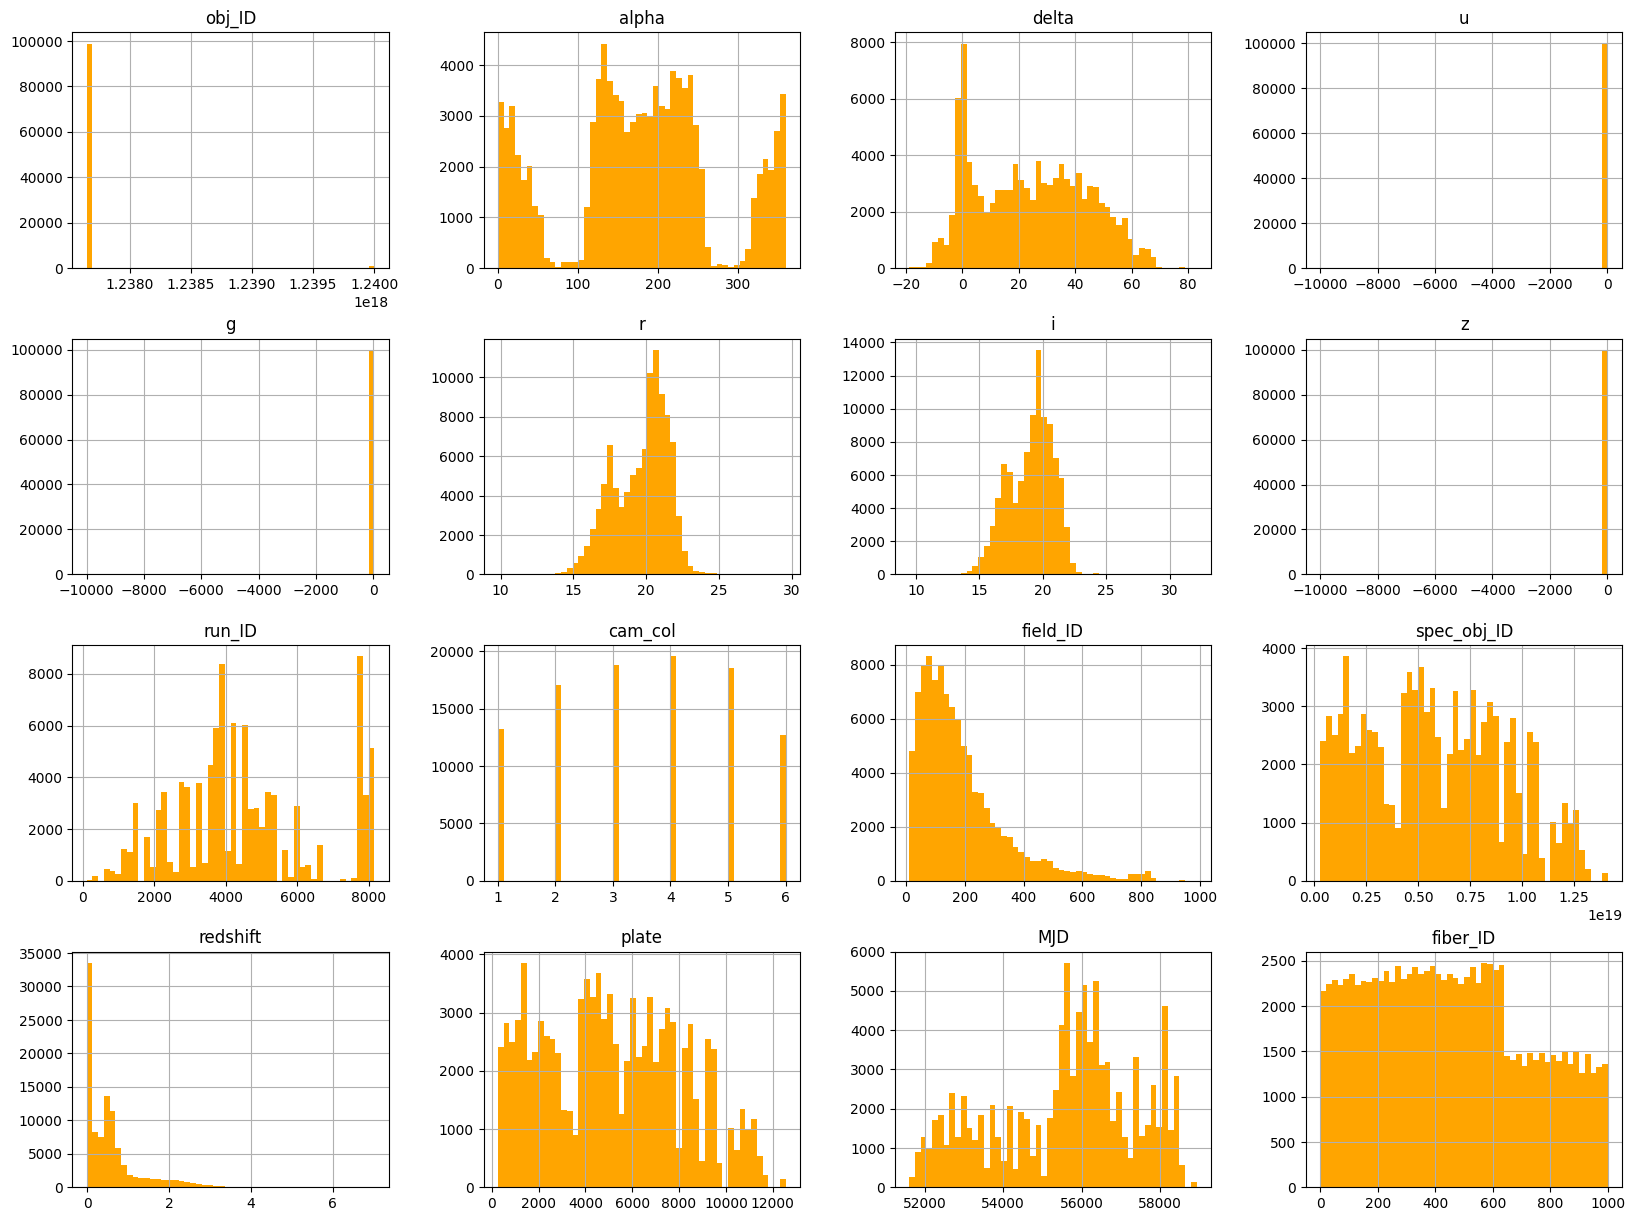

In [72]:
# Distribution of data using Histogram
ste_df.hist(bins=50, figsize=(20,15), color='orange')
plt.show()

In [73]:
# Create a function to delete potential outliers
def delete_outlier(ste_df, column):
    Q1 = ste_df[column].quantile(0.25)
    Q3 = ste_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    potential_outliers = ste_df[(ste_df[column] < lower_bound) | (ste_df[column] > upper_bound)]
    ste_df.drop(potential_outliers.index, inplace=True)

In [74]:
# Identify columns for Handling Outlier
ho_col = ['u', 'g', 'r', 'i', 'z']

# Delete Outliers for each column
for i in ho_col:
  delete_outlier(ste_df, i)

### Data Imputation

*While observing, I saw that the columns that contain NULL values ('u', 'g', 'r', 'i', 'z') are float-type, and their data distribution nears the center. So I will calculate the mean value for each col, then replace the NULL with Means based on its column.*

In [75]:
# Calculate the means
average_u = ste_df['u'].mean()
average_g = ste_df['g'].mean()
average_r = ste_df['r'].mean()
average_i = ste_df['i'].mean()
average_z = ste_df['z'].mean()

In [76]:
# Replace NULL with means
ste_df['u'].fillna(average_u, inplace=True)
ste_df['g'].fillna(average_g, inplace=True)
ste_df['r'].fillna(average_r, inplace=True)
ste_df['i'].fillna(average_i, inplace=True)
ste_df['z'].fillna(average_z, inplace=True)

In [77]:
# NULL checkpoint
ste_df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

**The dataset does not have missing values anymore.**

In [78]:
# Change the Classifier Column to the furthest right
move_column = ste_df.pop('class')
ste_df['class'] = move_column

## **More on Exploratory Data Analysis**

### Pie Chart to show the distribution of each class

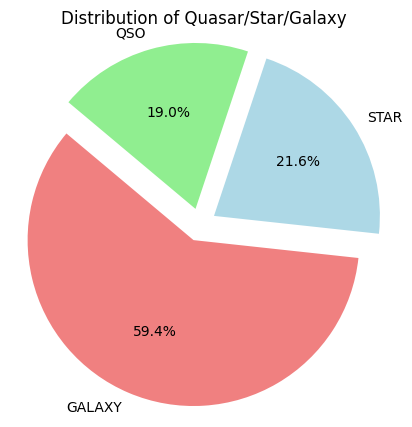

In [79]:
# Data for the pie chart
class_counts = ste_df['class'].value_counts()
labels = class_counts.index
sizes = class_counts.values
colors = ['lightcoral', 'lightblue', 'lightgreen']
explode = (0.1, 0.1, 0.1)

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title("Distribution of Quasar/Star/Galaxy")

# Show the pie chart
plt.show()

**The 3 classes of Stars are not distributed equally in the dataset, 'GALAXY' class takes account for 60% of the dataset, while 'STAR' only gets 21.6%, followed by 'QSO' with 19%.**

###Box plots to see the value distribution and potential outliers

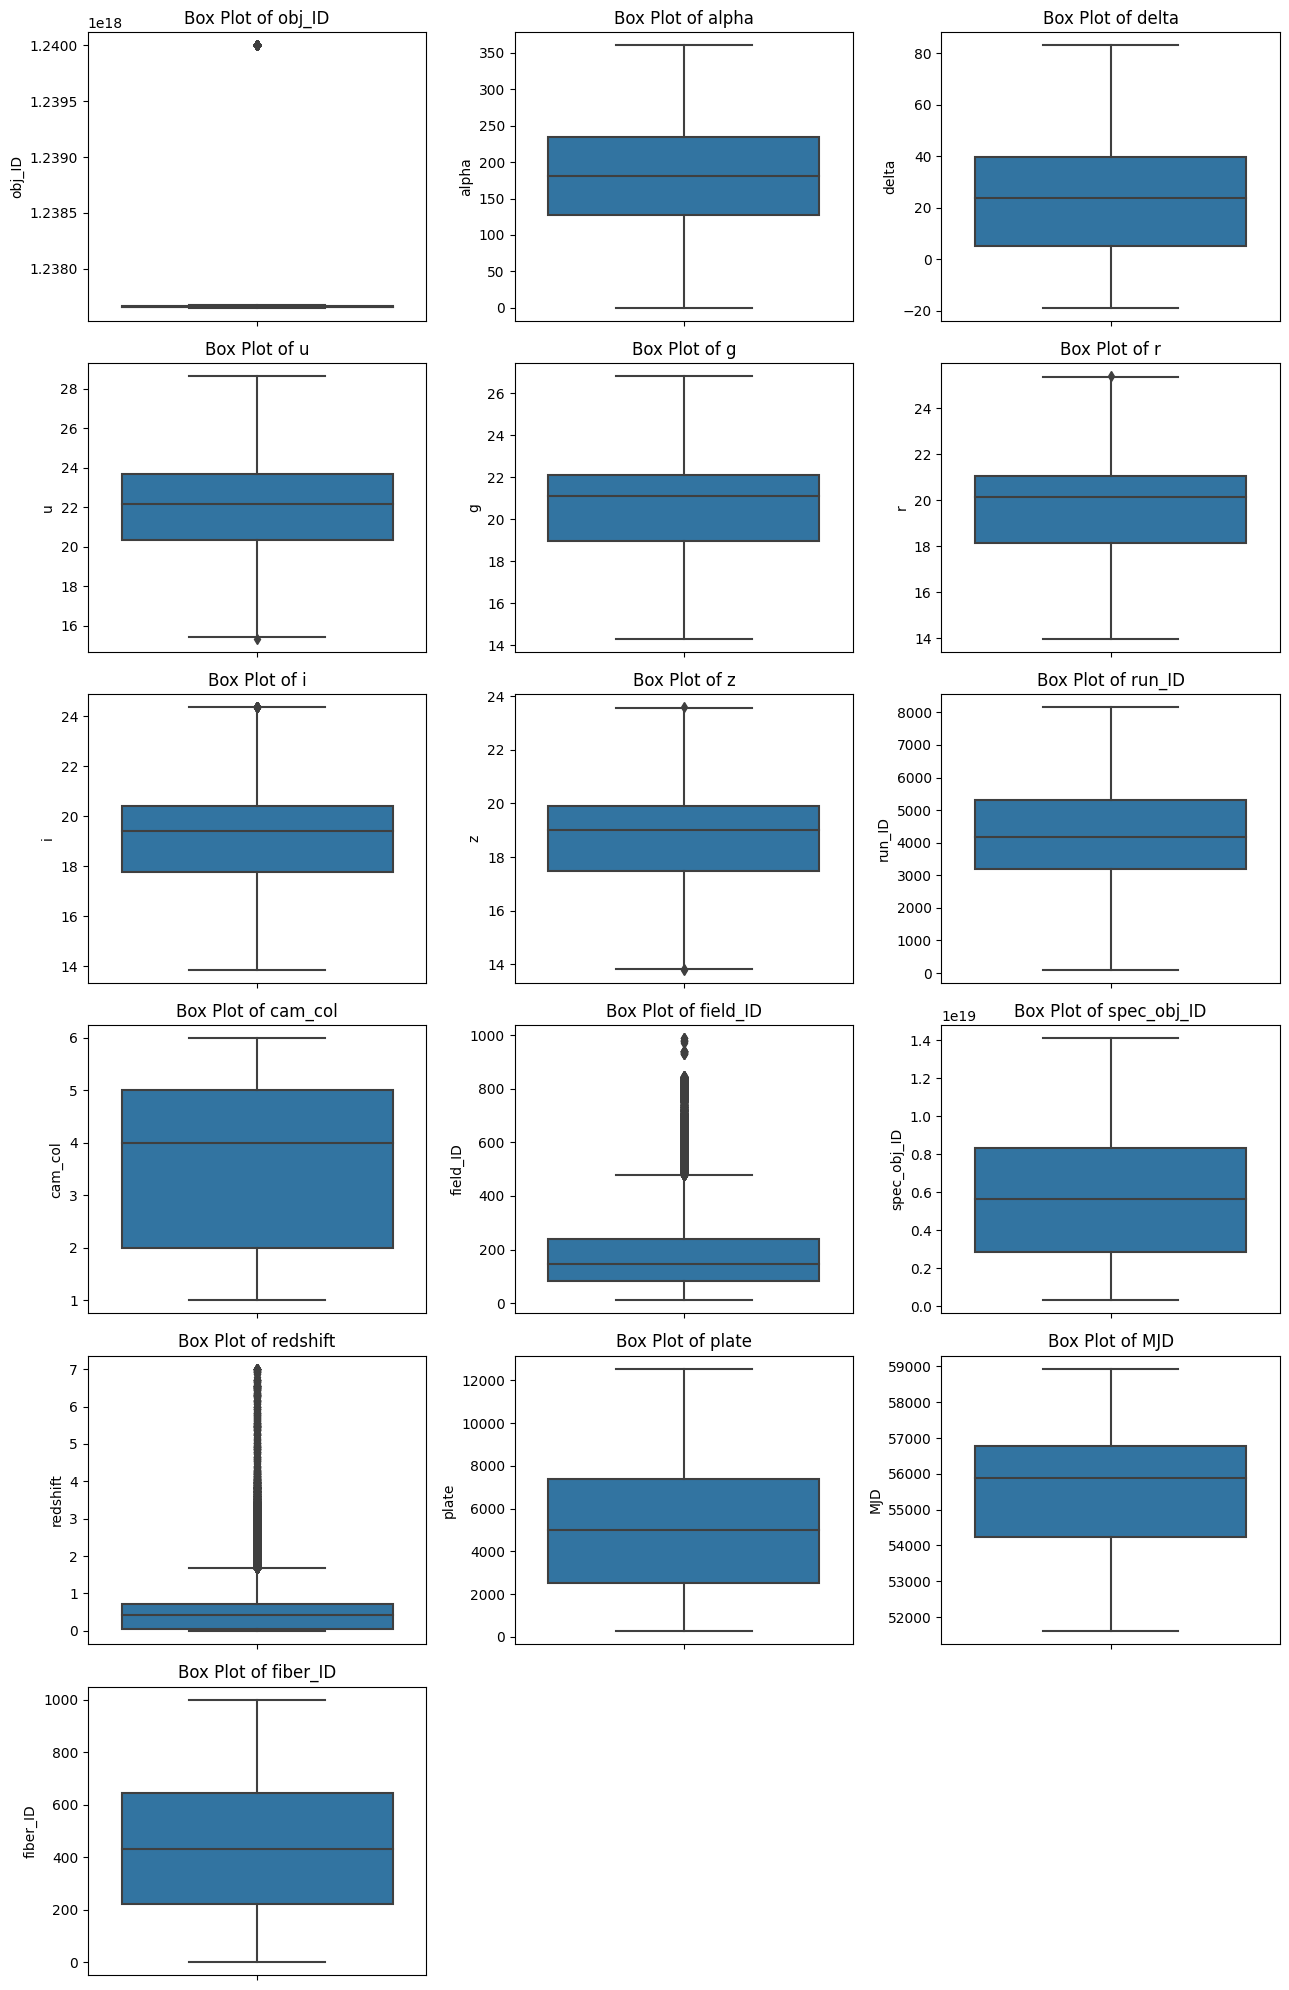

In [80]:
# Get all the columns with numeric type to create plots
numeric_col = ste_df.select_dtypes(include=['number']).columns

# Determine the number of rows and columns for subplots
num_rows = len(numeric_col) // 3 + (len(numeric_col) % 3 > 0)  # Calculate the number of rows
num_cols = min(3, len(numeric_col))  # Limit to 3 columns per row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 20))

# Flatten the axes array to handle both single and multiple rows
axes = axes.ravel()

# Use loop to go through all numeric columns and create box plots
for i, col in enumerate(numeric_col):
    sns.boxplot(data=ste_df, y=col, ax=axes[i])
    axes[i].set_title(f"Box Plot of {col}")
    axes[i].set_ylabel(col)

# Remove any empty subplots if there are more than needed
for i in range(len(numeric_col), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

## **Data Scaling**

### Balance the data using Undersampling

In [81]:
# Count values for each class
ste_df['class'].value_counts()

GALAXY    59084
STAR      21487
QSO       18911
Name: class, dtype: int64

**Use 18911 as default counts for 2 other classes**

In [82]:
# Undersampling by concating 18911 values from each class
qso_df = ste_df[ste_df['class'] == 'QSO']

star_df = ste_df[ste_df['class'] == 'STAR']
star_df = star_df.sample(n=18911, random_state=69)

galaxy_df = ste_df[ste_df['class'] == 'GALAXY']
galaxy_df = galaxy_df.sample(n=18911, random_state=69)

qso_df.reset_index(drop=True, inplace=True)
star_df.reset_index(drop=True, inplace=True)
galaxy_df.reset_index(drop=True, inplace=True)

# Merge into a new balanced dataset
new_df = pd.concat([qso_df, star_df, galaxy_df], axis=0)
new_df.reset_index(drop=True, inplace=True)

In [83]:
# New dataframe after balancing the class
new_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,1.237680e+18,340.995120,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,3,110,5.658980e+18,1.424659,5026,55855,741,QSO
1,1.237680e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,2,462,1.250000e+19,0.586455,11069,58456,113,QSO
2,1.237680e+18,1.494389,3.291746,20.38562,20.40514,20.29996,20.05918,19.89044,7712,5,339,9.843820e+18,2.031528,8743,57663,295,QSO
3,1.237660e+18,145.883005,47.300484,21.73992,21.53095,21.26763,21.36257,21.15861,2821,2,33,8.228240e+18,2.075680,7308,56709,596,QSO
4,1.237680e+18,20.052556,11.497881,21.89214,21.35124,21.18755,20.84300,20.76580,7773,2,441,1.246830e+19,1.528308,11074,58488,306,QSO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56728,1.237670e+18,170.772590,35.271745,19.29250,18.28932,17.82928,17.51370,17.35818,4552,6,23,2.376790e+18,0.130779,2111,53467,56,GALAXY
56729,1.237660e+18,141.548003,32.294804,24.80698,22.82297,20.45450,19.53517,18.97206,3704,1,65,6.539490e+18,0.566591,5808,56325,947,GALAXY
56730,1.237670e+18,153.900708,26.648546,22.37492,22.36539,22.06536,21.49036,22.49948,5071,4,263,1.083810e+19,0.844154,9626,57875,798,GALAXY
56731,1.237660e+18,202.944428,59.785549,26.01031,22.55888,20.94299,19.88039,19.39369,2243,6,397,7.667560e+18,0.540906,6810,56447,645,GALAXY


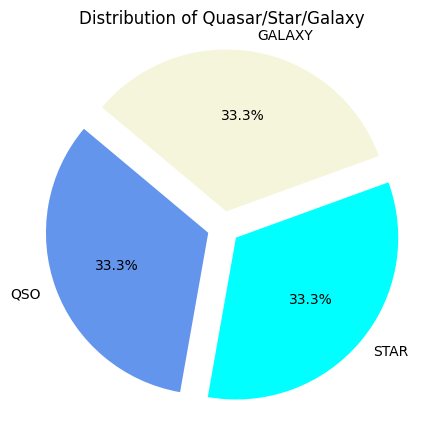

In [84]:
# Look again at the distribution of the classes
class_counts = new_df['class'].value_counts()
labels = class_counts.index
sizes = class_counts.values
colors = ['cornflowerblue', 'cyan', 'beige']
explode = (0.1, 0.1, 0.1)

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title("Distribution of Quasar/Star/Galaxy")

# Show the pie chart
plt.show()

**The distribution is now perfect, and ready to be used on model training**

### Encoding 'Class' using LabelEncoder

**Change the class name to numbers for better visualization and better efficiency**

In [85]:
# Encode the 'class' column in new_df
new_df['class'] = label_encoder.fit_transform(new_df['class'])

In [86]:
# Display the mapping between class names and encoded values
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:")
for class_name, encoded_value in class_mapping.items():
    print(f"{class_name}: {encoded_value}")

Class Mapping:
GALAXY: 0
QSO: 1
STAR: 2


**Target Classes:**

0 is for 'GALAXY'

1 is for  'QSO'

2 is for 'STAR'

### Correlation Heatmap

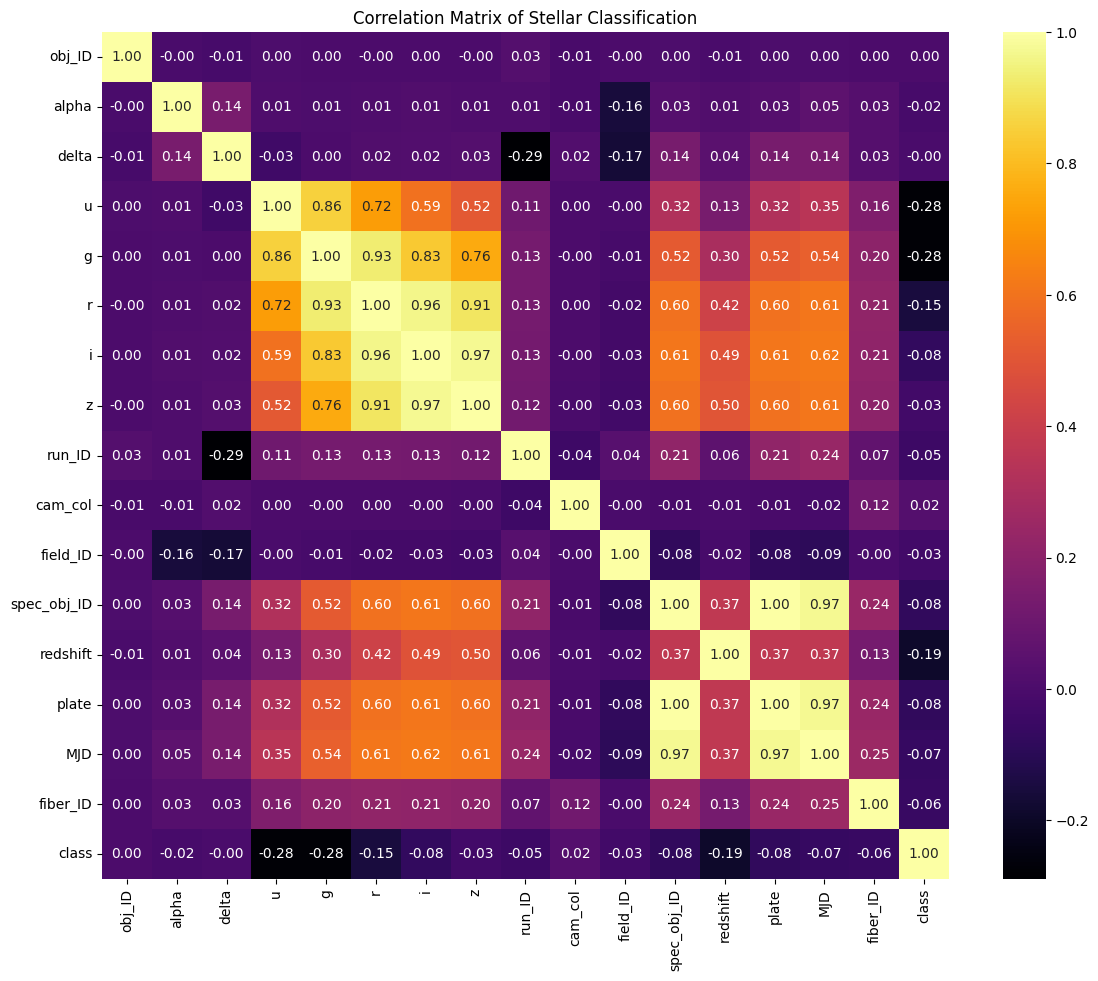

In [87]:
# Create heatmap to visualize
plt.figure(figsize=(14, 11))    # Change size of figure
# sns.set(font_scale=0.8)         # Font size
sns.heatmap(new_df.corr(), annot=True, cmap='inferno', fmt=".2f", square=True)

# Display Plot
plt.title("Correlation Matrix of Stellar Classification")
plt.show()

**Based on the Correlation Heatmap, there are some early assumptions that I made:**

1. Column u, g, r, i, z are heavily connected to each other

2. Column spec_obj_ID, redshift, plate, MJD, fiber_ID are also connected to each other, but not as solid

3. There are no columns that share a heavy relation with the target column (class)

4. First column obj_ID is not useful for Machine Learning models

## **Machine Learning Classifier model**

**For this part, I will use 7 different machine learning classification models to experiment and bring out the best models for later usage by Data Specialists**

Here are the name of the models I chose:

1. Logistic Regression

2. Decision Tree

3. Random Forest

4. Gradient Boosting

5. K-Nearest Neighbours

6. Gaussian Naive Bayes

7. Multi-layer Perception

In [91]:
# Choose the X and y variables
x = new_df.drop(['class', 'obj_ID'], axis=1)
y = new_df['class']

In [93]:
# Split the Train/Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=42)

**Run all classifier models at once**

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from tabulate import tabulate

# Create a list of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Multi-layer Perceptron", MLPClassifier())
]

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["Classifier", "Balanced Accuracy", "Training Accuracy", "Testing Accuracy", "F1 Score", "Precision", "Recall"])

# Train and evaluate each classifier
for name, clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    # Use predict_proba to get class probabilities
    y_prob = clf.predict_proba(x_test)

    # Calculate ROC AUC score for multiclass classification using 'ovr' strategy
    auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')  # Use 'weighted' or 'macro' as appropriate

    accuracy_train = accuracy_score(y_train, clf.predict(x_train))
    accuracy_test = accuracy_score(y_test, y_pred)

    # Calculate F1 score with 'weighted' or 'macro' average for multiclass classification
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' or 'macro' as appropriate
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' or 'macro' as appropriate
    recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' or 'macro' as appropriate

    results_df = results_df.append({
        "Classifier": name,
        "Balanced Accuracy": auc_score,
        "Training Accuracy": accuracy_train,
        "Testing Accuracy": accuracy_test,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall
    }, ignore_index=True)

# Sort the DataFrame by Balanced Accuracy in descending order
results_df = results_df.sort_values(by="Balanced Accuracy", ascending=False)

# Print the results table with styling
styled_results = results_df.style.background_gradient(cmap='Blues', subset=["Balanced Accuracy", "Training Accuracy", "Testing Accuracy", "F1 Score", "Precision", "Recall"])
styled_results = styled_results.hide_index()

# print(styled_results)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-102-f75d9159467c>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-102-f75d9159467c>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-102-f75d9159467c>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-102-f75d9159467c>:42: FutureWarning: The frame.append method is depreca

In [103]:
# Show the chart for comparsion
styled_results

Classifier,Balanced Accuracy,Training Accuracy,Testing Accuracy,F1 Score,Precision,Recall
Gradient Boosting,0.995640,0.974728,0.972412,0.972399,0.972601,0.972412
Random Forest,0.995079,1.000000,0.971722,0.971669,0.971706,0.971722
Decision Tree,0.967824,1.000000,0.957085,0.957061,0.957044,0.957085
K-Nearest Neighbors,0.754028,0.712275,0.597900,0.597495,0.611114,0.597900
Logistic Regression,0.651239,0.332364,0.336578,0.169514,0.113284,0.336578
Gaussian Naive Bayes,0.651239,0.471797,0.473983,0.405506,0.456044,0.473983
Multi-layer Perceptron,0.500000,0.332364,0.336578,0.169514,0.113284,0.336578


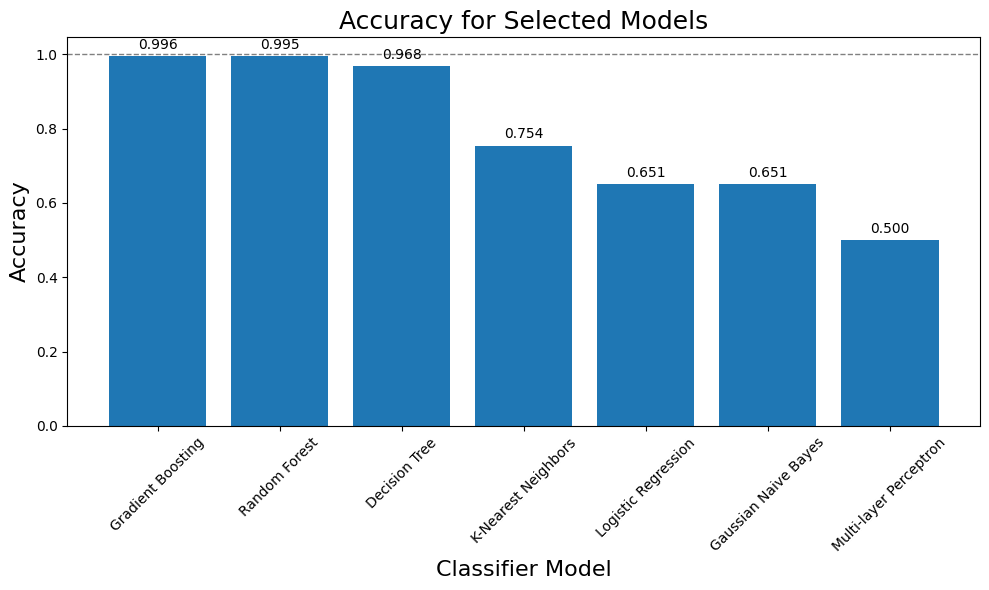

In [107]:
# Create a bar chart for the filtered rows
plt.figure(figsize=(10,6))
bars = plt.bar(results_df['Classifier'], results_df['Balanced Accuracy'])

# Add labels and title
plt.xlabel('Classifier Model', fontsize=16)
plt.xticks(fontsize=10, rotation=45)  # Rotate x-axis labels for readability
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy for Selected Models', fontsize=18)
plt.axhline(y=1.0, color='gray', linestyle='--', linewidth=1)

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}',  # Display accuracy values with 3 decimal places
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # Offset the text above the bar
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

# Show the chart
plt.tight_layout()  # Ensure the labels and values fit within the plot
plt.show()

**It is clear that Gradient Boosting and Random Forest are the 2 best models with the accuracy of 99.6% and 99.5%. Followed by Decision Tree model with 96.8%**.

**The other 4 models K-Nearest Neighbors, Logistic Regression, Gaussian Naive Bayes and Multi-layer Perceptron are not at all reliable since the rate are significantly lower than the 3 first machine learning models.**

**Multi-layer Perceptron is by far the worst model with the score is at 50%, which means this model works as good as a person guessing the answer.**

Now, I will see the stats for 3 best models at the below section. >>

### Model Rank 1: Gradient Boosting

#### *Training Model*

In [111]:
# Create and fit the Gradient Boosting Classifier
start_grad = time.time()    # Start timer
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
clf.fit(x_train, y_train)

# Make predictions on the test set
y_grad = clf.predict(x_test)
end_grad = time.time()      # End timer

####*Classification Report*

In [134]:
# Classification Report
run_grad = end_grad - start_grad    # Calculate time efficiency
classification_grad = classification_report(y_test, y_grad, target_names=["GALAXY", "QSO", "STAR"])
report_grad = classification_report(y_test, y_grad, output_dict=True)

print(classification_grad)
print()
print("Time consumed: ", round(run_grad, 3), "seconds")

              precision    recall  f1-score   support

      GALAXY       0.95      0.97      0.96      4299
         QSO       0.97      0.95      0.96      4392
        STAR       1.00      1.00      1.00      4358

    accuracy                           0.97     13049
   macro avg       0.97      0.97      0.97     13049
weighted avg       0.97      0.97      0.97     13049


Time consumed:  106.216 seconds


####*Confusion Matrix*

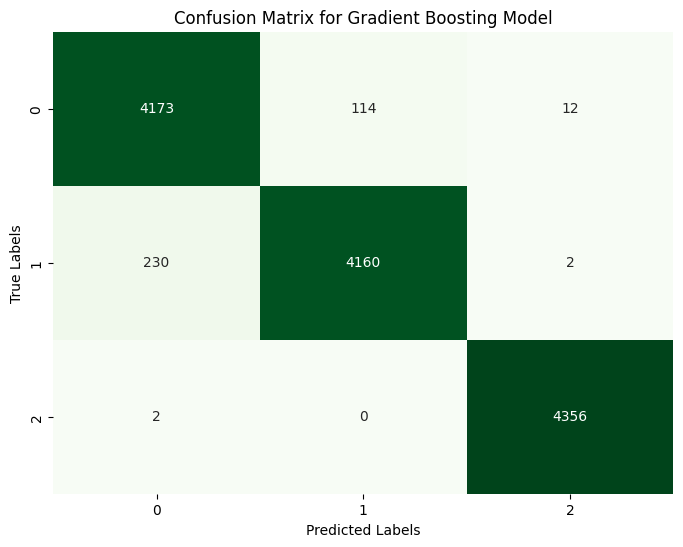


GALAXY - 0 / QSO - 1 / STAR - 2


In [122]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_grad)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()

# Show categories
print()
print("GALAXY - 0 / QSO - 1 / STAR - 2")

### Model Rank 2: Random Forest

#### *Training Model*

In [125]:
# Create and fit the Random Forest Classifier
start_rf = time.time()    # Start timer
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)

# Make predictions on the test set
y_rf = clf.predict(x_test)
end_rf = time.time()      # End timer

####*Classification Report*

In [135]:
# Classification Report
run_rf = end_rf - start_rf    # Calculate time efficiency
classification_rf = classification_report(y_test, y_rf, target_names=["GALAXY", "QSO", "STAR"])
report_rf = classification_report(y_test, y_rf, output_dict=True)

print(classification_rf)
print()
print("Time consumed: ", round(run_rf, 3), "seconds")

              precision    recall  f1-score   support

      GALAXY       0.95      0.96      0.96      4299
         QSO       0.97      0.96      0.96      4392
        STAR       0.99      1.00      0.99      4358

    accuracy                           0.97     13049
   macro avg       0.97      0.97      0.97     13049
weighted avg       0.97      0.97      0.97     13049


Time consumed:  21.619 seconds


####*Confusion Matrix*

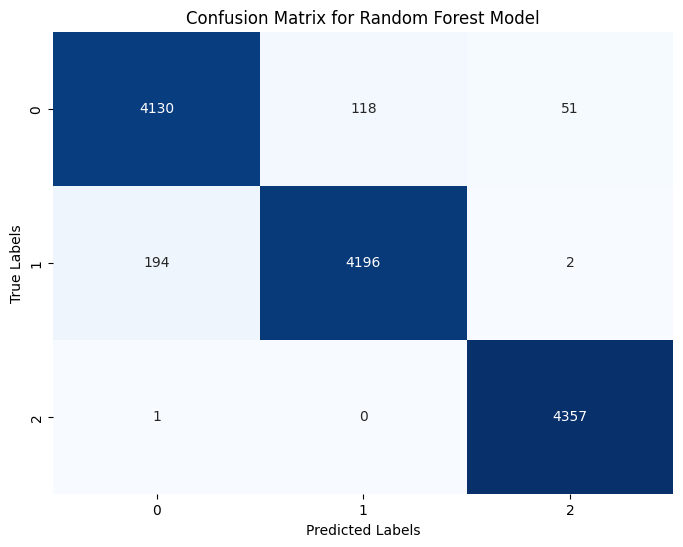


GALAXY - 0 / QSO - 1 / STAR - 2


In [128]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Show categories
print()
print("GALAXY - 0 / QSO - 1 / STAR - 2")

### Model Rank 3: Decision Tree

#### *Training Model*

In [129]:
# Create and fit the Decision Tree Classifier
start_tree = time.time()    # Start timer
clf = DecisionTreeClassifier(max_depth=None, random_state=0)
clf.fit(x_train, y_train)

# Make predictions on the test set
y_tree = clf.predict(x_test)
end_tree = time.time()      # End timer

####*Classification Report*

In [136]:
# Classification Report
run_tree = end_tree - start_tree    # Calculate time efficiency
classification_tree = classification_report(y_test, y_tree, target_names=["GALAXY", "QSO", "STAR"])
report_tree = classification_report(y_test, y_tree, output_dict=True)

print(classification_tree)
print()
print("Time consumed: ", round(run_tree, 3), "seconds")

              precision    recall  f1-score   support

      GALAXY       0.94      0.93      0.93      4299
         QSO       0.93      0.94      0.94      4392
        STAR       1.00      1.00      1.00      4358

    accuracy                           0.96     13049
   macro avg       0.96      0.96      0.96     13049
weighted avg       0.96      0.96      0.96     13049


Time consumed:  0.952 seconds


####*Confusion Matrix*

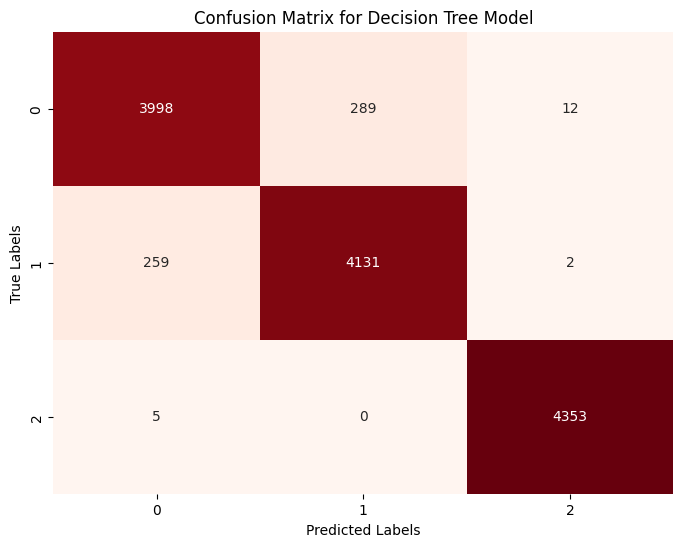


GALAXY - 0 / QSO - 1 / STAR - 2


In [131]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

# Show categories
print()
print("GALAXY - 0 / QSO - 1 / STAR - 2")

### Comparison and Evaluation for 3 models

#### Accuracy scores

In [139]:
# Get the accuracy score of each model
accuracy_grad = report_grad['accuracy']
accuracy_rf = report_rf['accuracy']
accuracy_tree = report_tree['accuracy']

#### Construct a Dataframe

In [141]:
# Define the data
data = [
    ['Gradient Boosting', accuracy_grad, run_grad],
    ['Random Forest', accuracy_rf, run_rf],
    ['Decision Tree', accuracy_tree, run_tree]
]

# Define the headers
headers = ['Name of Model', 'Accuracy score', 'Time Efficiency']

# Create the DataFrame
evaluation = pd.DataFrame(data, columns=headers)

# Display the DataFrame
print(evaluation)

       Name of Model  Accuracy score  Time Efficiency
0  Gradient Boosting        0.972412       106.216492
1      Random Forest        0.971952        21.618898
2      Decision Tree        0.956548         0.951685


#### Build a bar + line chart

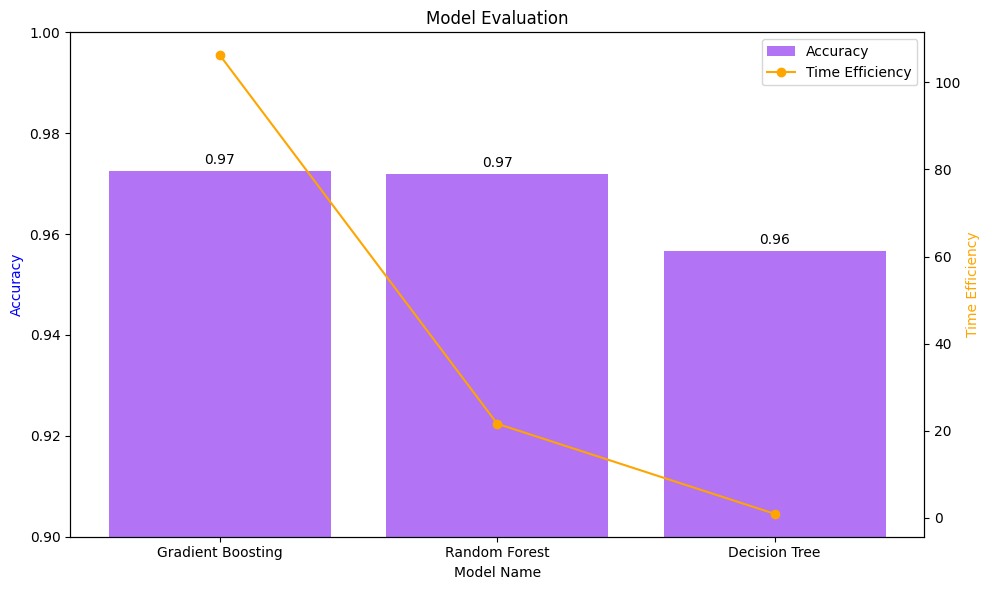

In [151]:
# Set the figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create a bar chart for Accuracy (using the left y-axis)
bars = ax1.bar(evaluation['Name of Model'], evaluation['Accuracy score'], color='#b273f5', label='Accuracy')
ax1.set_xlabel('Model Name')
ax1.set_ylabel('Accuracy', color='blue')

# Set the y-axis limit for the bar chart
ax1.set_ylim(0.9, 1.0)

# Create a line chart for Time Efficiency (using the right y-axis)
ax2 = ax1.twinx()
ax2.plot(evaluation['Name of Model'], evaluation['Time Efficiency'], marker='o', color='orange', label='Time Efficiency')
ax2.set_ylabel('Time Efficiency', color='orange')

# Add labels and title
plt.title('Model Evaluation')
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Display the chart
plt.tight_layout()
plt.show()

**CONCLUSION: Gradient Boosting and Random Forest are the best. But Decision Tree has the best time performance which as fast as almost 0 second to run and train the model.**

So if the dataset has not too much data, I would simply choose Gradient Boosting.

So if the dataset has a massive database, I will go with Decision Tree Machine Learning model because it is amazingly fast compared to the other 2.